In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import shap
# warnings.filterwarnings('ignore')  # Better to see warnings for debugging
from langchain_huggingface import HuggingFaceEndpoint


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [ ]:
heart_disease = pd.read_csv('heart.csv')

In [ ]:
heart_disease.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# number of rows and Columns in this dataset
heart_disease.info()
# heart_disease= heart_disease.astype({'age':'int'})  # Removed: age already int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# getting the statistical measures of the data
heart_disease.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Train Test Split
X_train, X_test, Y_train, Y_test=train_test_split(heart_disease.drop("target", axis=1),heart_disease["target"], test_size=0.3)

In [ ]:
#Model Training
classifier = xgb.XGBClassifier()
classifier.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Accuracy
print('Training accuracy {:.4f}'.format(classifier.score(X_train,Y_train)))
print('Testing accuracy {:.4f}'.format(classifier.score(X_test,Y_test)))


Training accuracy 1.0000
Testing accuracy 0.9643


In [ ]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier, X_train, Y_train,cv=5)
# Print average accuracy
print(f"Average Accuracy: {cv_scores.mean()}")


Average Accuracy: 0.9622766122766123


In [ ]:
# GridSearchCV for finding the best hyperparameters
# Define the parameter grid
param_grid = {
'n_estimators': [100, 150, 200],
'learning_rate': [0.05, 0.1, 0.15],
'max_depth': [5, 6, 7],
'subsample': [0.4, 0.5, 0.6],}


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=classifier,param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.4, 0.5, 0.6]},
             scoring='accuracy')

In [ ]:
print('Best parameters:', grid_search.best_params_)
print('Best accuracy:', grid_search.best_score_)
#Bulding on the best parameters
# Use the best parameters found by GridSearchCV
classifier = xgb.XGBClassifier(
    learning_rate=grid_search.best_params_['learning_rate'],
    max_depth=grid_search.best_params_['max_depth'],
    n_estimators=grid_search.best_params_['n_estimators'],
    subsample=grid_search.best_params_['subsample']
)


Best parameters: {'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.6}
Best accuracy: 0.9664724164724164


In [ ]:
classifier.fit(X_train, Y_train)
train_accuracy = classifier.score(X_train, Y_train)
print('Training accuracy: {:.4f}'.format(train_accuracy))
test_accuracy = classifier.score(X_test, Y_test)
print('Testing accuracy: {:.4f}'.format(test_accuracy))


Training accuracy: 0.9986
Testing accuracy: 0.9578


In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier, X_train, Y_train,cv=5)
# Print average accuracy
print(f"Average Accuracy: {cv_scores.mean()}")

Average Accuracy: 0.9524961149961151


In [ ]:
# Saving the trained model
import pickle
filename = 'heart_model1.pkl'
# Save model with proper error handling
try:
    with open(filename, 'wb') as f:
        pickle.dump(classifier, f)
    print(f"Model saved successfully as {filename}")
except Exception as e:
    print(f"Error saving model: {e}")
#explain prediction with the shap values
explainer=shap.Explainer(classifier)
shap_values=explainer(X_test)


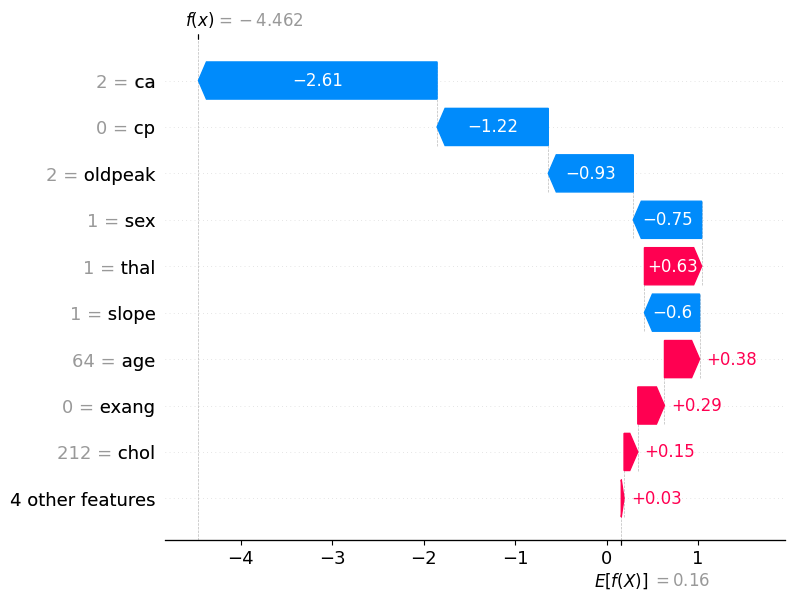

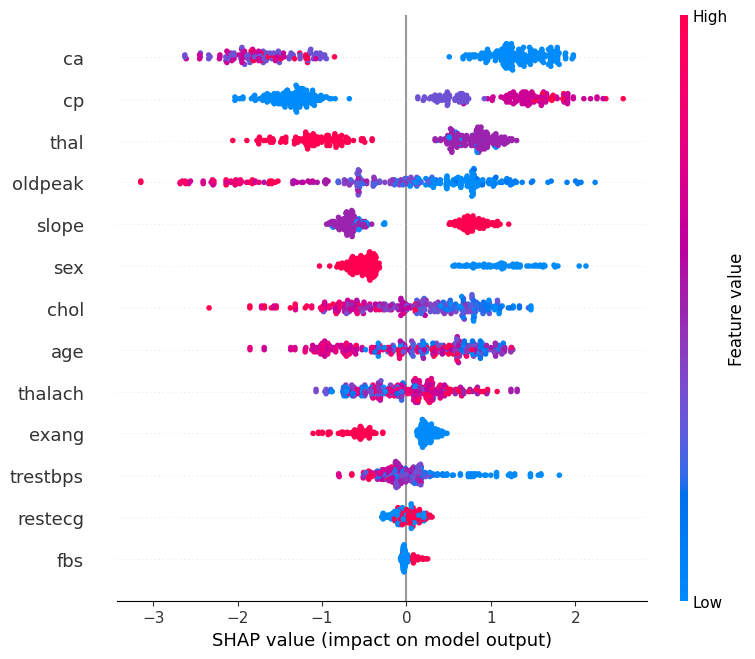

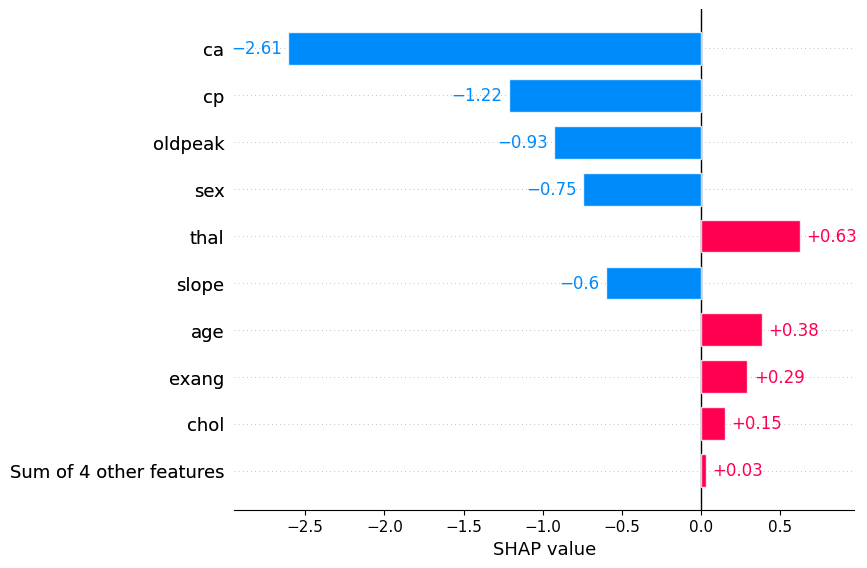

In [ ]:
#visualize the shap values for a specific instance
shap.plots.waterfall(shap_values[0])
#summary plot of shap values
shap.summary_plot(shap_values,X_test)
shap.plots.bar(shap_values[0])


In [ ]:
# Index of the prediction you want to explain
prediction_index = 0
# Get SHAP values for the specific prediction
shap_values_pred = shap_values[prediction_index]


In [ ]:
 # Get the absolute SHAP values and corresponding feature names
 abs_shap_values = np.abs(shap_values_pred.values)
 feature_names = X_train.columns
 feature_names_exp = ['Age of the individual', 'Gender of the individual', 'Chest pain type experienced by the individual',
 'Resting blood pressure upon admission to the hospital', 'Serum cholesterol level','Fasting blood sugar', 'Resting electrocardiographic results',
 'Maximum heart rate achieved during the Thallium stress test',
 'Exercise-induced angina', 'ST depression induced by exercise relative to rest',
 'Slope of the peak exercise ST segment','Number of major vessels colored by fluoroscopy', 'Thalassemia type']
 feature_names_exp = np.asarray(feature_names_exp)


In [ ]:
# Sort the absolute SHAP values and feature names by the absolute SHAP values
sorted_indices = np.argsort(abs_shap_values)[::-1]
sorted_abs_shap_values = abs_shap_values[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
sorted_feature_names_exp = feature_names_exp[sorted_indices]


In [ ]:
print("Sorted Feature Names:")
print(sorted_feature_names_exp)
# Print the features responsible for the prediction
print("Features responsible for the prediction:")
for feature, shap_value in zip(sorted_feature_names,sorted_abs_shap_values):
    print(f"{feature}: {shap_value}")

Sorted Feature Names:
['Number of major vessels colored by fluoroscopy'
 'Chest pain type experienced by the individual'
 'ST depression induced by exercise relative to rest'
 'Gender of the individual' 'Thalassemia type'
 'Slope of the peak exercise ST segment' 'Age of the individual'
 'Exercise-induced angina' 'Serum cholesterol level'
 'Maximum heart rate achieved during the Thallium stress test'
 'Resting electrocardiographic results'
 'Resting blood pressure upon admission to the hospital'
 'Fasting blood sugar']
Features responsible for the prediction:
ca: 2.6090192794799805
cp: 1.215741515159607
oldpeak: 0.9292254447937012
sex: 0.7477424740791321
thal: 0.6259246468544006
slope: 0.6031680107116699
age: 0.3842507004737854
exang: 0.29151007533073425
chol: 0.15020966529846191
thalach: 0.1164904311299324
restecg: 0.09787699580192566
trestbps: 0.03741354122757912
fbs: 0.02574130706489086


In [ ]:
# Print the expanded features responsible for the prediction
print("Expanded Features responsible for the prediction:")
for feature, shap_value in zip(sorted_feature_names_exp,sorted_abs_shap_values):
    print(f"{feature}: {shap_value}")


Expanded Features responsible for the prediction:
Number of major vessels colored by fluoroscopy: 2.6090192794799805
Chest pain type experienced by the individual: 1.215741515159607
ST depression induced by exercise relative to rest: 0.9292254447937012
Gender of the individual: 0.7477424740791321
Thalassemia type: 0.6259246468544006
Slope of the peak exercise ST segment: 0.6031680107116699
Age of the individual: 0.3842507004737854
Exercise-induced angina: 0.29151007533073425
Serum cholesterol level: 0.15020966529846191
Maximum heart rate achieved during the Thallium stress test: 0.1164904311299324
Resting electrocardiographic results: 0.09787699580192566
Resting blood pressure upon admission to the hospital: 0.03741354122757912
Fasting blood sugar: 0.02574130706489086


In [ ]:
ranked_features = sorted(zip(feature_names,abs_shap_values), key=lambda x: x[1], reverse=True)
ranked_features_exp = sorted(zip(feature_names_exp,abs_shap_values), key=lambda x: x[1], reverse=True)


In [ ]:
# Construct a prompt based on feature importance
top_features = [f"{ranked_features_exp} with an importance score of {round(float(sorted_abs_shap_values), 2)}" for ranked_features_exp, sorted_abs_shap_values in ranked_features_exp[:5]]
# Create the prompt
prompt = ("Based on the model's analysis, the prediction was primarily influenced by the following factors: "+ ", ".join(top_features)
 + ". Could you provide a detailed explanation of why these factors are significant?")
print(prompt)


Based on the model's analysis, the prediction was primarily influenced by the following factors: Number of major vessels colored by fluoroscopy with an importance score of 2.61, Chest pain type experienced by the individual with an importance score of 1.22, ST depression induced by exercise relative to rest with an importance score of 0.93, Gender of the individual with an importance score of 0.75, Thalassemia type with an importance score of 0.63. Could you provide a detailed explanation of why these factors are significant?


In [ ]:
import os

#Chatbot - Fixed security issue by using environment variables
huggingfacehub_api_token = os.getenv('HUGGINGFACE_API_TOKEN', 'your-api-token-here')
repo_id = os.getenv('HUGGINGFACE_REPO_ID', 'microsoft/DialoGPT-medium')

if huggingfacehub_api_token == 'your-api-token-here':
    print("Warning: Please set HUGGINGFACE_API_TOKEN environment variable")
    print("Skipping LLM explanation due to missing API token")
else:
    try:
        llm = HuggingFaceEndpoint(repo_id=repo_id, huggingfacehub_api_token=huggingfacehub_api_token)
        bot_response = llm.invoke(prompt, temperature=0.2, top_k=10)
        bot_response_html = f'<div style="overflow-wrap: break-word; height: auto; padding: 10px;">{prompt}</div>'
        bot_response_html += f'<div style="overflow-wrap: break-word; height: auto; padding: 10px;">{bot_response}</div>'
        print(bot_response_html)
    except Exception as e:
        print(f"Error calling LLM API: {e}")
        print("Please check your API token and repository ID configuration")

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to C:\Users\aadhi\.cache\huggingface\token
Login successful
<div style="overflow-wrap: break-word; height: auto; padding: 10px;">Based on the model's analysis, the prediction was primarily influenced by the following factors: Number of major vessels colored by fluoroscopy with an importance score of 2.61, Chest pain type experienced by the individual with an importance score of 1.22, ST depression induced by exercise relative to rest with an importance score of 0.93, Gender of the individual with an importance score of 0.75, Thalassemia type with an importance score of 0.63. Could you provide a detailed explanation of why these factors are significant?</div><div style="overflow-wrap: break-word; 